In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
full_weather_df = pd.read_csv("resources/merged_weather.csv")

full_weather_df.head()

,Name,Avg. Temp,Min. Temp,Max. Temp,Precip.,month,year
0,Marin,51.5,43.2,59.7,2.83,December,2020
1,Marin,53.5,44.2,62.8,1.54,November,2020
2,Marin,66.2,54.4,78.0,0.01,October,2020
3,Marin,66.8,56.7,77.0,0.00,September,2020
4,Marin,66.7,56.4,77.1,0.25,August,2020


In [3]:
# Rename the county column from "Name" to "County"

full_weather_df = full_weather_df.rename(columns={"Name": "County"})

full_weather_df.head()

,County,Avg. Temp,Min. Temp,Max. Temp,Precip.,month,year
0,Marin,51.5,43.2,59.7,2.83,December,2020
1,Marin,53.5,44.2,62.8,1.54,November,2020
2,Marin,66.2,54.4,78.0,0.01,October,2020
3,Marin,66.8,56.7,77.0,0.00,September,2020
4,Marin,66.7,56.4,77.1,0.25,August,2020


In [5]:
sorted_weather = full_weather_df.sort_index(ascending=False)

sorted_weather

,County,Avg. Temp,Min. Temp,Max. Temp,Precip.,month,year
2459,Sonoma,50.4,42.5,58.4,9.08,January,1980
2458,Sonoma,52.6,44.2,61.0,11.91,February,1980
2457,Sonoma,50.9,40.1,61.7,2.67,March,1980
2456,Sonoma,53.9,42.7,65.2,2.62,April,1980
2455,Sonoma,55.0,44.6,65.4,0.58,May,1980
...,...,...,...,...,...,...,...
4,Marin,66.7,56.4,77.1,0.25,August,2020
3,Marin,66.8,56.7,77.0,0.00,September,2020
2,Marin,66.2,54.4,78.0,0.01,October,2020
1,Marin,53.5,44.2,62.8,1.54,November,2020


In [6]:
def plot_line_graph(df, y_label, county):
    sorted_filtered = df[df["County"] == county].sort_index(ascending=False)
    x_values = (sorted_filtered["month"].astype(str) + sorted_filtered["year"].astype(str))
    y_values = sorted_filtered[y_label]
#    fig = plt.figure()

    plt.plot(x_values, y_values)

#    plt.close(fig)


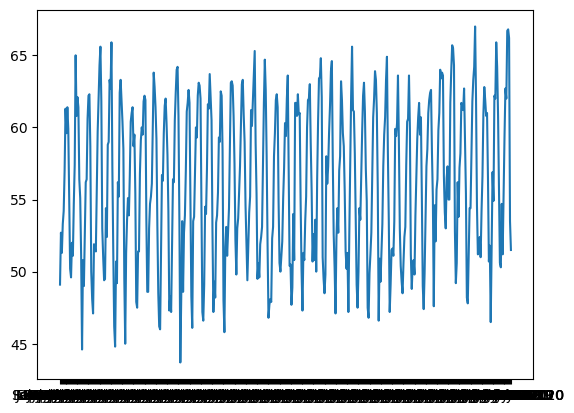

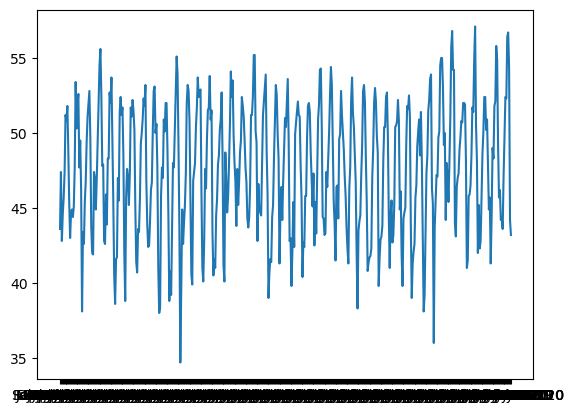

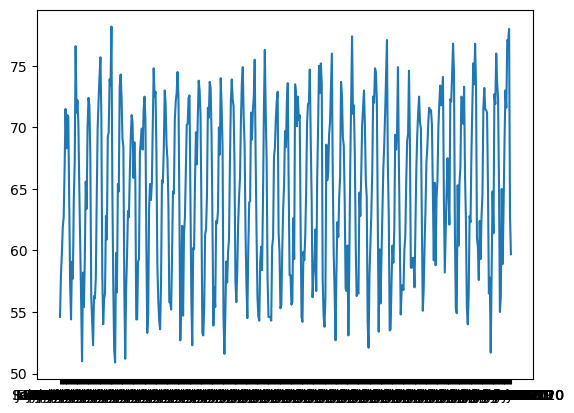

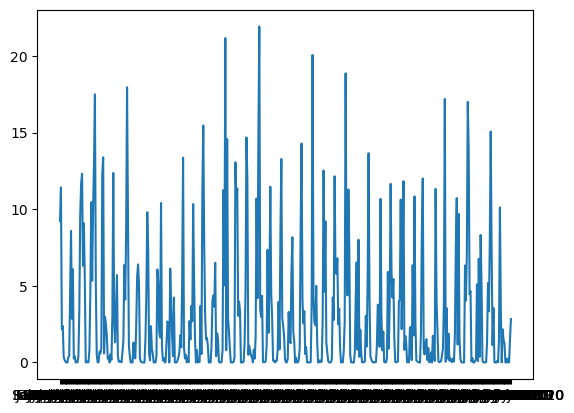

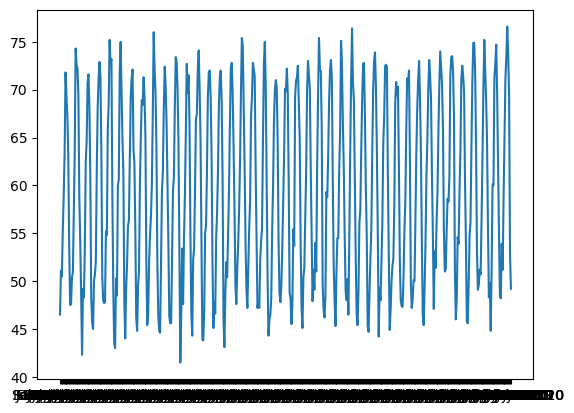

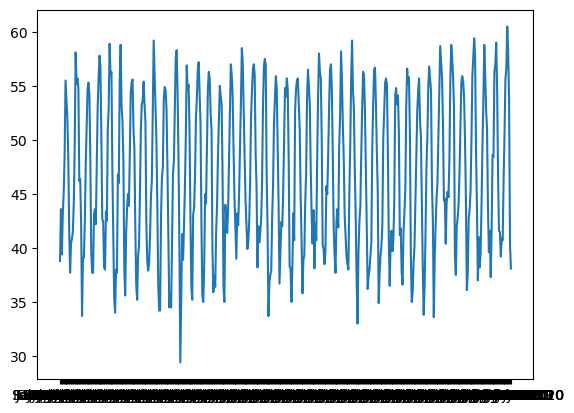

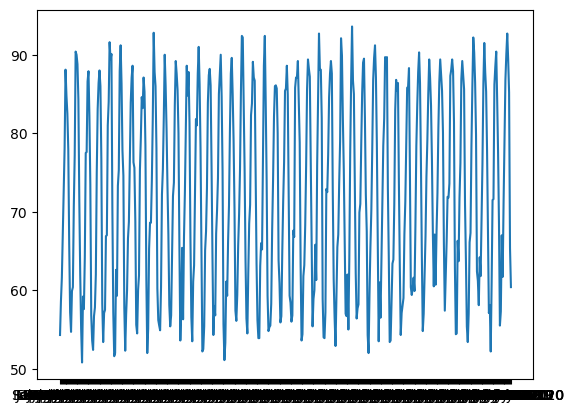

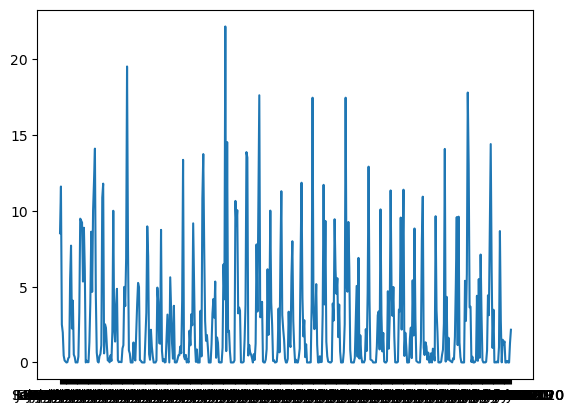

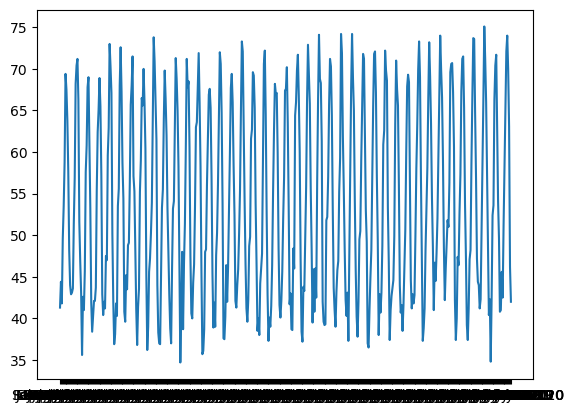

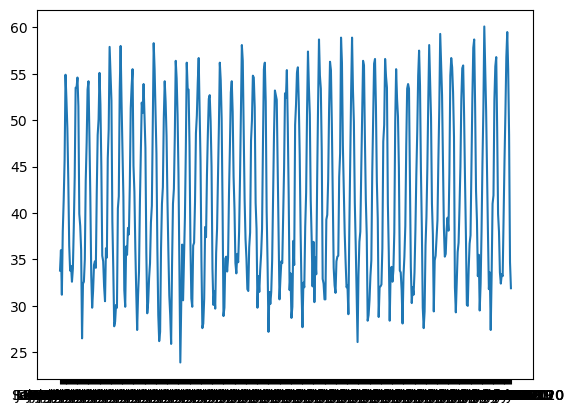

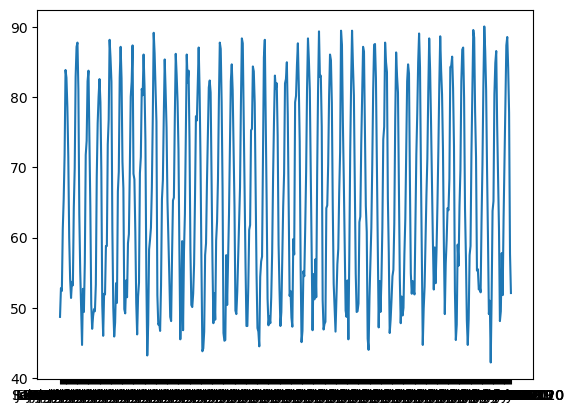

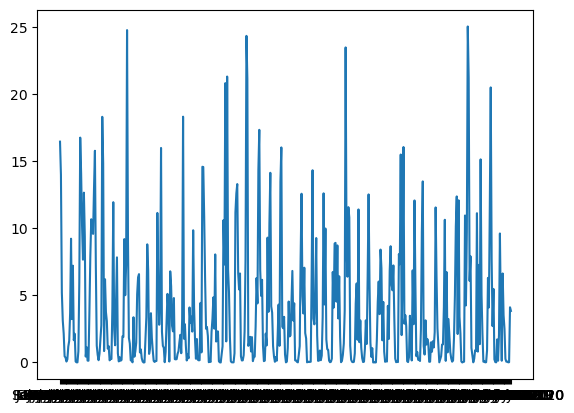

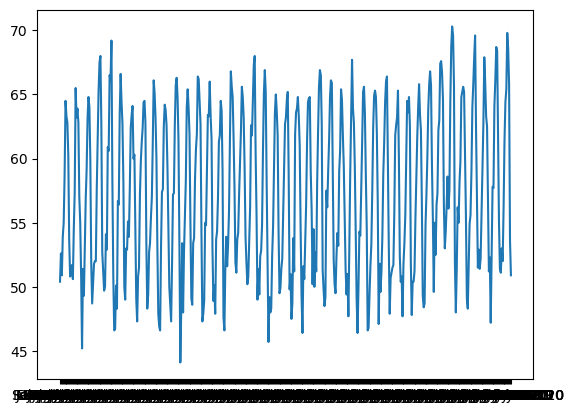

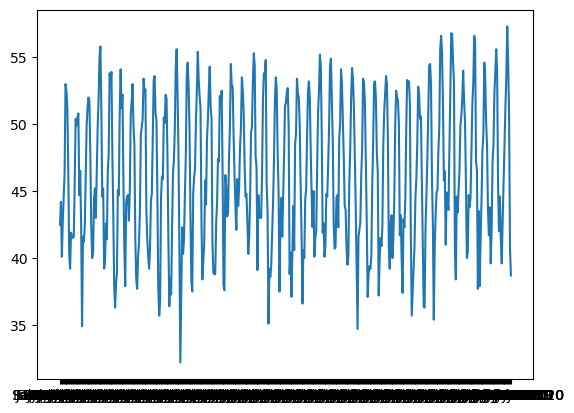

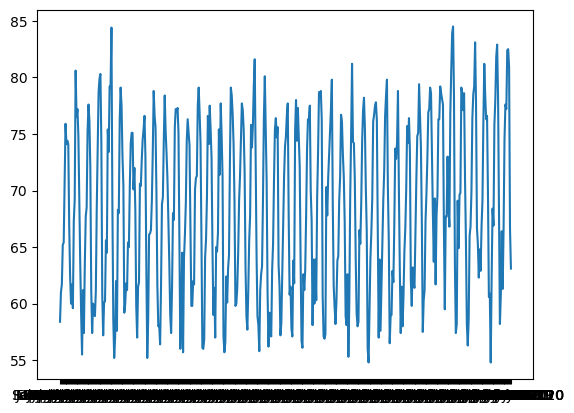

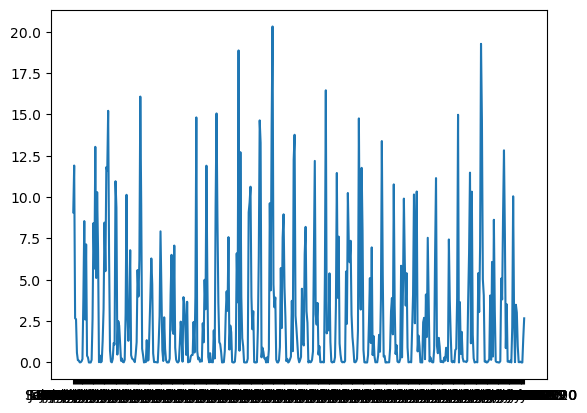

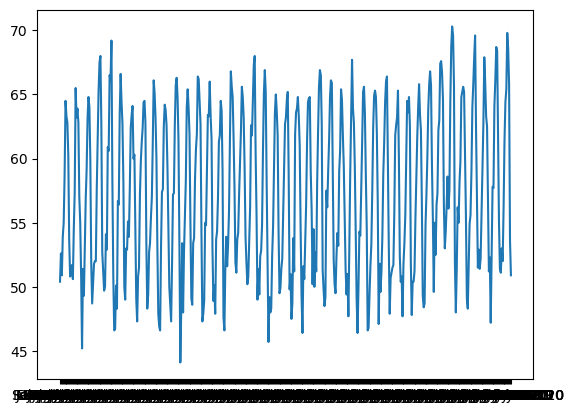

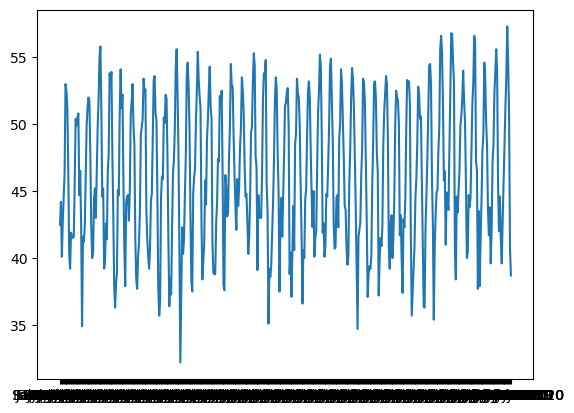

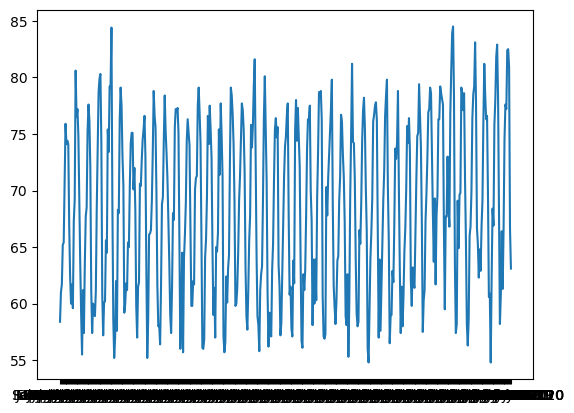

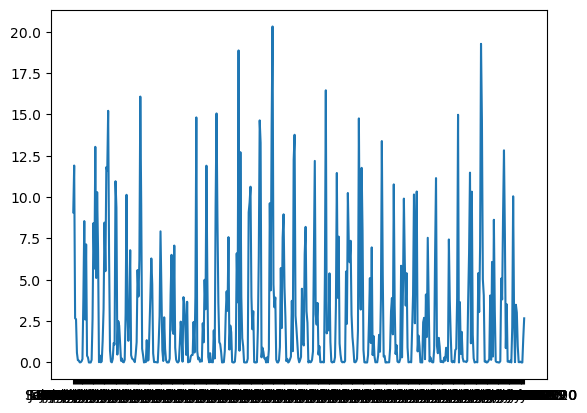

In [7]:
counties = full_weather_df["County"].unique()

for county in counties:

    for value in ["Avg. Temp", "Min. Temp", "Max. Temp", "Precip."]:
        plot_line_graph(full_weather_df, value, county)
        plt.show()


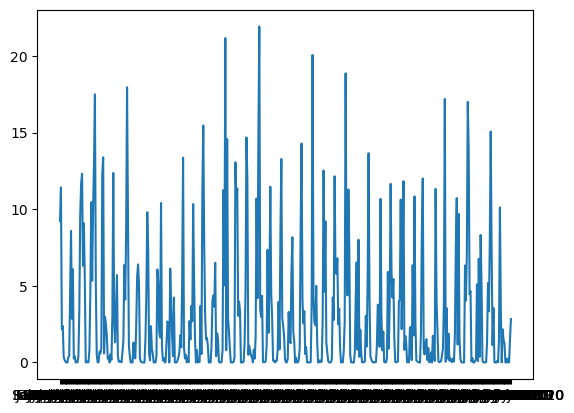

In [27]:
temp_df = full_weather_df[full_weather_df["County"] == "Marin"].sort_index(ascending=False)
temp_x = (temp_df["month"].astype(str) + temp_df["year"].astype(str))
temp_y = temp_df["Precip."]

plt.plot(temp_x, temp_y)

